In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import fipy as fp
from fipy.tools import numerix as nmx

In [4]:
mesh = fp.dump.read("mesh.dmp")

In [5]:
C = fp.CellVariable(mesh=mesh, value=0., name="C")

In [15]:
eta = [fp.CellVariable(mesh=mesh, name=r"$\eta_{{{i}}}$".format(i=i+1), hasOld=True) for i in range(10)]

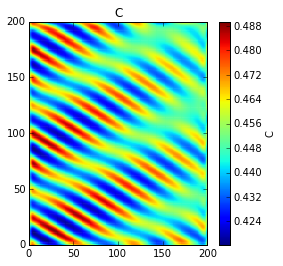

In [16]:
Cviewer = fp.MatplotlibViewer(vars=C)

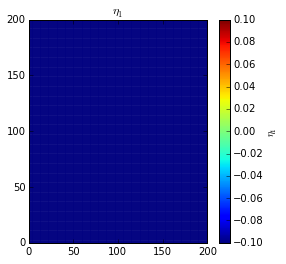

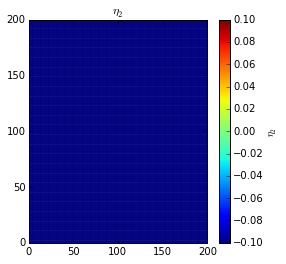

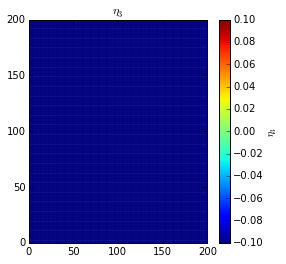

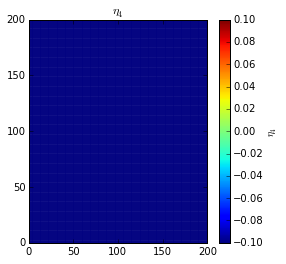

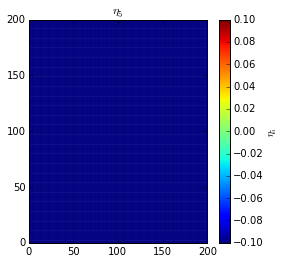

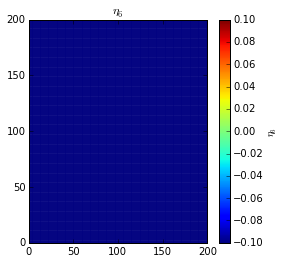

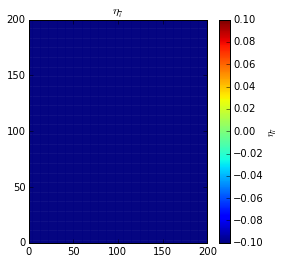

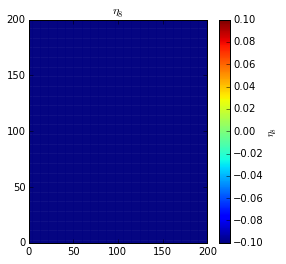

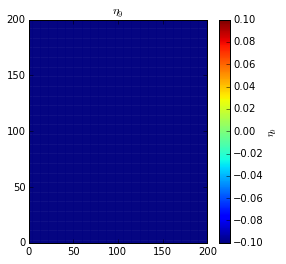

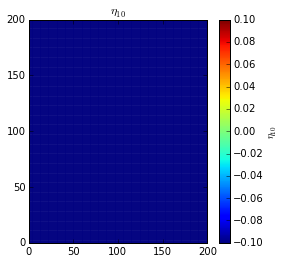

In [17]:
etaviewer = [fp.MatplotlibViewer(vars=etai) for etai in eta]

In [187]:
!cat stats.txt

step	t	dt	Cmin	Cmax	f
1	0.01	0.01	0.439485366902	0.460283561726	2076.1615144
2	0.02	0.01	0.439158678514	0.460494527762	2076.14658194
3	0.03	0.01	0.43898203367	0.460649759184	2076.13290362
4	0.04	0.01	0.438908335405	0.460762789485	2076.12005809
5	0.05	0.01	0.438902220286	0.460843752367	2076.10778178
6	0.06	0.01	0.438809605502	0.460900246155	2076.09590524
7	0.07	0.01	0.438719771004	0.460937977415	2076.08431655
8	0.08	0.01	0.43864469793	0.460961240326	2076.07293977
9	0.09	0.01	0.438527398915	0.460976527851	2076.05062514
10	0.1	0.01	0.438481067443	0.460972861818	2076.03962125
11	0.11	0.01	0.438440974873	0.461000787088	2076.02868922
12	0.12	0.01	0.4384060482	0.461073699074	2076.0178127
13	0.13	0.01	0.438375445533	0.461143273442	2076.00697875
14	0.14	0.01	0.438318836572	0.461221670826	2075.99617694
15	0.15	0.01	0.438265895279	0.461299438205	2075.98539867
16	0.16	0.01	0.438219142078	0.461374867556	2075.97463677
17	0.17	0.01	0.438152446903	0.461448079039	2075.96388517
18	0.18	0.01	0.4380637848

In [177]:
!ls -lt

total 1302288
-rw-r--r--+ 1 guyer  guyer    53987 Oct 15 20:16 stats.txt
-rw-r--r--+ 1 guyer  guyer  4046575 Oct 15 18:01 556.gz
-rw-r--r--+ 1 guyer  guyer  4044784 Oct 15 17:57 552.gz
-rw-r--r--+ 1 guyer  guyer  4044601 Oct 15 17:55 550.gz
-rw-r--r--+ 1 guyer  guyer  4042298 Oct 15 17:54 548.gz
-rw-r--r--+ 1 guyer  guyer  4041394 Oct 15 17:49 547.gz
-rw-r--r--+ 1 guyer  guyer  4040426 Oct 15 17:48 546.gz
-rw-r--r--+ 1 guyer  guyer  4039451 Oct 15 17:48 545.gz
-rw-r--r--+ 1 guyer  guyer  4038145 Oct 15 17:47 544.gz
-rw-r--r--+ 1 guyer  guyer  4037495 Oct 15 17:46 543.gz
-rw-r--r--+ 1 guyer  guyer  4036877 Oct 15 17:46 542.gz
-rw-r--r--+ 1 guyer  guyer  4035102 Oct 15 17:45 541.gz
-rw-r--r--+ 1 guyer  guyer  4033949 Oct 15 17:45 540.gz
-rw-r--r--+ 1 guyer  guyer  4032705 Oct 15 17:44 539.gz
-rw-r--r--+ 1 guyer  guyer  4031255 Oct 15 17:44 538.gz
-rw-r--r--+ 1 guyer  guyer  4028508 Oct 15 17:43 537.gz
-rw-r--r--+ 1 guyer  guyer  4027315 Oct 15 17:42 536.gz
-rw-r--r--+ 1 guyer  guyer  402

In [220]:
step, t, dt, Cmin, Cmax, f = nmx.loadtxt(fname="stats.txt", skiprows=1, unpack=True)

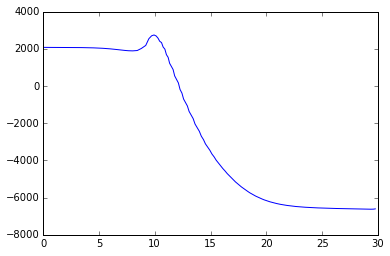

In [222]:
plt.plot(t[:560], f[:560])

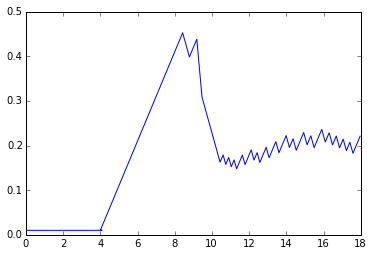

In [219]:
plt.plot(t[:500], dt[:500])

In [276]:
values = nmx.loadtxt(fname="451.gz", skiprows=1, unpack=True)
x, y = values[0:2]
Cval = values[2]
etaval = values[3:]

In [277]:
C.value = Cval
for etai, etavali in zip(eta, etaval):
    etai.value = etavali

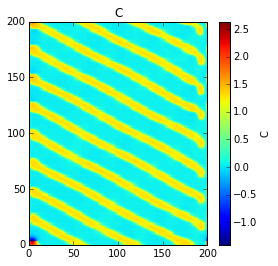

In [182]:
Cviewer.plot()

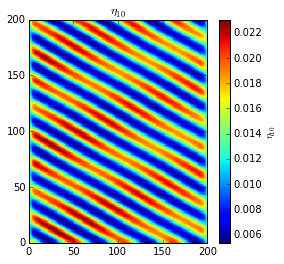

In [26]:
for viewer in etaviewer:
    viewer.plot()

In [150]:
threshold = fp.Variable(0.2)
phase = 0.
for i, etai in enumerate(eta):
    phase += (i + etai) * (etai > threshold)
phase.name = "$\eta$"

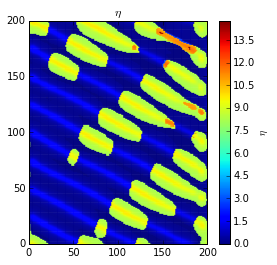

In [151]:
phase_viewer = fp.MatplotlibViewer(vars=phase)

In [283]:
threshold.value = 0.3

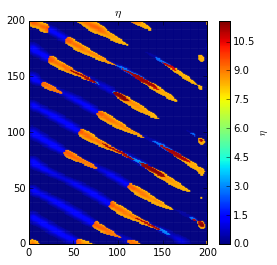

In [284]:
phase_viewer.plot()

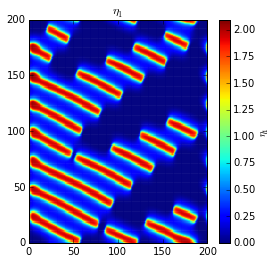

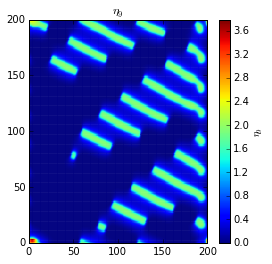

In [198]:
[fp.MatplotlibViewer(vars=eta[0]), fp.MatplotlibViewer(vars=eta[8])]

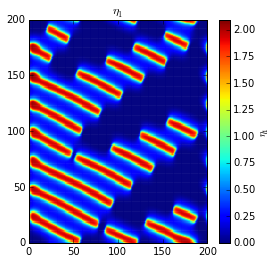

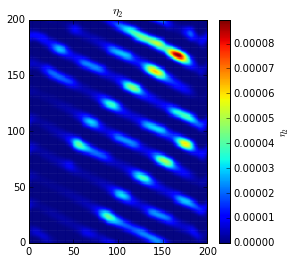

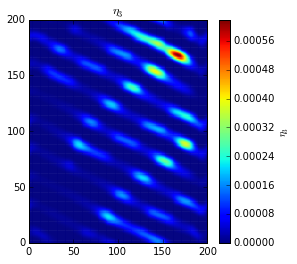

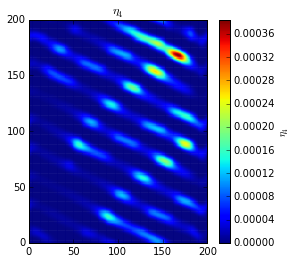

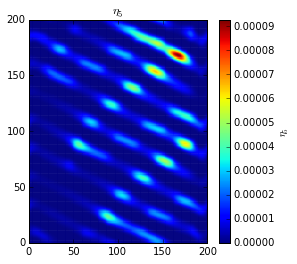

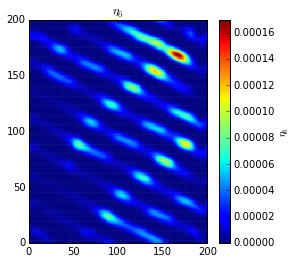

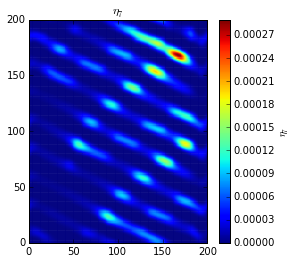

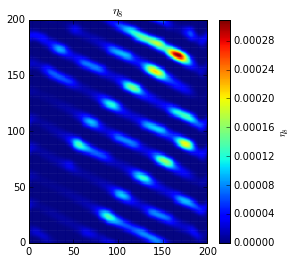

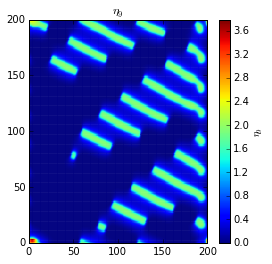

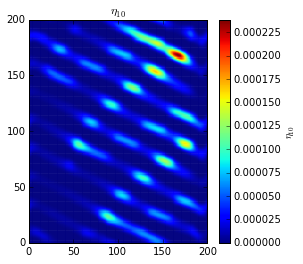

In [199]:
[fp.MatplotlibViewer(vars=etai) for etai in eta]

In [200]:
import matplotlib.animation as manimation

In [207]:
MagickWriter = manimation.writers['imagemagick_file']

In [208]:
writer = MagickWriter?

In [210]:
metadata = dict(title='Problem 2a', artist='Jon Guyer', comment='Periodic')

In [211]:
writer = MagickWriter(fps=15, metadata=metadata)

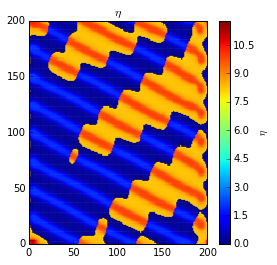

In [212]:
phase_viewer.axes.figure

In [218]:
with writer.saving(phase_viewer.axes.figure, "problem2a.mov", 5):
    for i in range(5):
        writer.grab_frame()

MovieWriter.grab_frame: Grabbing frame.
FileMovieWriter.frame_sink: saving frame 0 to fname=_tmp0000000.png
MovieWriter.grab_frame: Grabbing frame.
FileMovieWriter.frame_sink: saving frame 1 to fname=_tmp0000001.png
MovieWriter.grab_frame: Grabbing frame.
FileMovieWriter.frame_sink: saving frame 2 to fname=_tmp0000002.png
MovieWriter.grab_frame: Grabbing frame.
FileMovieWriter.frame_sink: saving frame 3 to fname=_tmp0000003.png
MovieWriter.grab_frame: Grabbing frame.
FileMovieWriter.frame_sink: saving frame 4 to fname=_tmp0000004.png
MovieWriter.run: running command: convert -delay 6.66666666667 -loop 0 _tmp*.png problem2a.mov


UnsupportedOperation: IOStream has no fileno.

In [214]:
!ls

0.gz            367.gz          443.gz          474.gz          505.gz          535.gz
100.gz          37.gz           444.gz          475.gz          506.gz          536.gz
101.gz          378.gz          445.gz          476.gz          507.gz          537.gz
11.gz           389.gz          446.gz          477.gz          508.gz          538.gz
111.gz          400.gz          447.gz          478.gz          509.gz          539.gz
121.gz          402.gz          448.gz          479.gz          51.gz           540.gz
131.gz          408.gz          449.gz          480.gz          510.gz          541.gz
141.gz          41.gz           450.gz          481.gz          511.gz          542.gz
151.gz          413.gz          451.gz          482.gz          512.gz          543.gz
161.gz          416.gz          452.gz          483.gz          513.gz          544.gz
171.gz          419.gz          453.gz          484.gz          514.gz          545.gz
181.gz          421.gz          454.gz     

In [215]:
from matplotlib import verbose

In [216]:
verbose.set_level('debug')